In [1]:
import numpy as np
import pandas as pd
import ast

from algorithms.global_random_search import global_random_search
from algorithms.hill_climbing import hillClimbing
from algorithms.local_random_search import local_random_search
from plot import plot
from time import time


In [2]:
# Encontrar Minimo
def f1(x1, x2):
    return x1**2 + x2**2

f1Dom = [(-100, 100), (-100, 100)]

# Encontrar máximo
def f2(x1, x2):
    return np.exp(-(x1**2 + x2**2)) + 2 * np.exp(-((x1-1.7)**2 + (x2-1.7)**2))

f2Dom = [(-2, 4), (-2, 5)]

# Encontrar mínimo
def f3(x1 , x2):
    return x1 ** 2 * np.sin(4 * np.pi * x1) - x2 * np.sin(4 * np.pi * x2 + np.pi) + 1

f3Dom = [(-2, 2), (-2, 2)]

# Encontrar mínimo
def f4(x1, x2):
    return (x1 ** 2 - 10 * np.cos(2 * np.pi * x1) + 10) + (x2 ** 2 - 10 * np.cos(2 * np.pi * x2) + 10)

f4Dom = [(-5.12, 5.12), (-5.12, 5.12)]

# Encontrar máximo
def f5(x1, x2):
    return (x1 * np.cos(x1)) / 20 + 2 * np.exp(-x1 ** 2 - (x2 - 1) ** 2) + 0.01 * x1 * x2

f5Dom = [(-10, 10), (-10, 10)]

# Encontrar máximo
def f6(x1, x2):
    return x1 * np.sin(4 * np.pi * x1) - x2 * np.sin(4 * np.pi * x2 + np.pi) + 1

f6Dom = [(-1, 3), (-1, 3)]

# Encontrar mínimo
def f7(x1, x2):
    return - np.sin(x1) * (np.sin(x1 ** 2 / np.pi)) ** 2 * 10 - np.sin(x2) * (np.sin(2 * x2 ** 2 / np.pi)) ** 2 * 10

f7Dom = [(0, np.pi), (0, np.pi)]

# Encontrar mínimo
def f8(x1, x2):
    return - (x2 + 47) * np.sin(np.sqrt(np.abs(x1 / 2 + (x2 + 47)))) - x1 * np.sin(np.sqrt(np.abs(x1 - (x2 + 47))))

f8Dom = [(-200, 20), (-200, 20)]

In [3]:
args = [
    {
        "name": "f1",
        "objective_function": f1,
        "type": "minimize", 
        "sigma": 10,
        "max_iter": 1000,
        "domain": f1Dom,
        "num_executions": 100,
    },
    {   
        "name": "f2",
        "objective_function": f2,
        "type": "maximize",
        "sigma": .1,
        "max_iter": 1000,
        "domain": f2Dom,
        "num_executions": 100
    },
    {
        "name": "f3",
        "objective_function": f3,
        "type": "minimize",
        "sigma": .1,
        "max_iter": 1000,
        "domain": f3Dom,
        "num_executions": 100
    },
    {
        "name": "f4",
        "objective_function": f4,
        "type": "minimize",
        "sigma": .1,
        "max_iter": 1000,
        "domain": f4Dom,
        "num_executions": 100
    },
    {
        "name": "f5",
        "objective_function": f5,
        "type": "maximize",
        "sigma": .1,
        "max_iter": 1000,
        "domain": f5Dom,
        "num_executions": 100
    },
    {
        "name": "f6",
        "objective_function": f6,
        "type": "maximize",
        "sigma": .1,
        "max_iter": 1000,
        "domain": f6Dom,
        "num_executions": 100
    },
    {
        "name": "f7",
        "objective_function": f7,
        "type": "minimize",
        "sigma": .1,
        "max_iter": 1000,
        "domain": f7Dom,
        "num_executions": 100
    },
    {
        "name": "f8",
        "objective_function": f8,
        "type": "minimize",
        "sigma": .1,
        "max_iter": 1000,
        "domain": f8Dom,
        "num_executions": 100
    }
]

header = ["Function", "Execution", "xbest", "fbest"]

algorithms = [
    {
        "name": "local_random_search",
        "function": local_random_search
    },
    {
        "name": "global_random_search",
        "function": global_random_search
    },
    {
        "name": "hill_climbing",
        "function": hillClimbing
    }
]

In [4]:
for algorithm in algorithms:
    df_aux = pd.DataFrame(columns=header, index=range(100))
    index = 0
    for arg in args:
        for i in range(arg['num_executions']):
            xbest, fbest = algorithm["function"](arg['objective_function'], arg['sigma'], arg['max_iter'], arg['domain'][0], arg['domain'][1], t=arg["type"])
            row = [arg['name'], i+1, (xbest), fbest]
            df_aux.loc[index] = row
            index += 1
        df_aux.to_csv(f"{algorithm['name']}.csv", index=False)

In [5]:
# Tabela com a moda de solução para cada algoritmo
df = pd.DataFrame(columns=["Function", "Metodo", "xbest", "fbest"])
for arg in args:
    for algorithm in algorithms:
        df_aux = pd.read_csv(f"{algorithm['name']}.csv")
        df_aux = df_aux[df_aux["Function"] == arg["name"]]
        metodo = algorithm["name"]
        xbest = df_aux["xbest"].mode().values[0]
        fbest = df_aux[df_aux["xbest"] == xbest]["fbest"].values[0]
        row = [arg["name"], metodo, xbest, fbest]
        df.loc[len(df)] = row
df.to_csv("best_solutions.csv", index=False)


### QUESTÃO 01 ### 

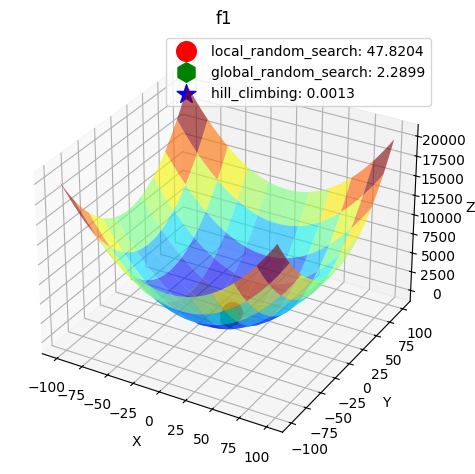

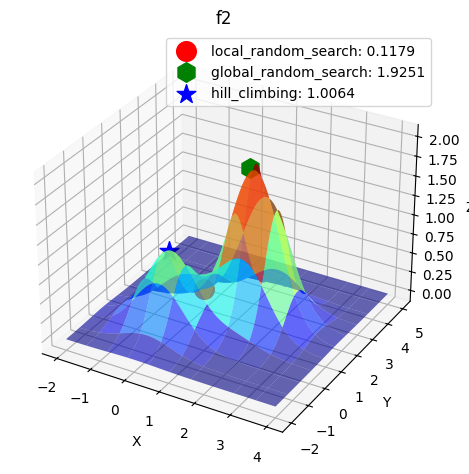

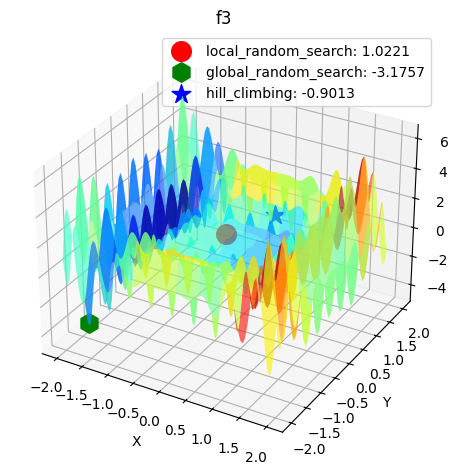

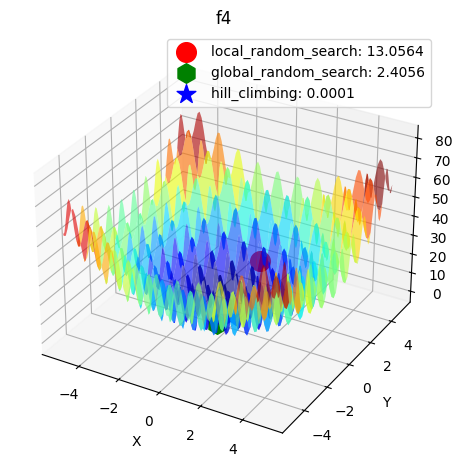

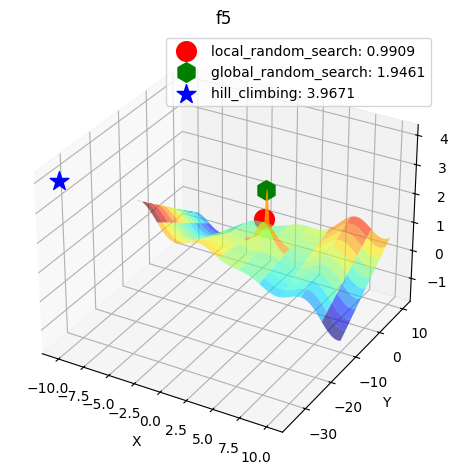

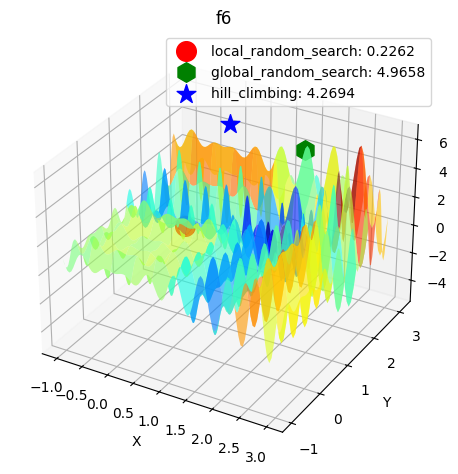

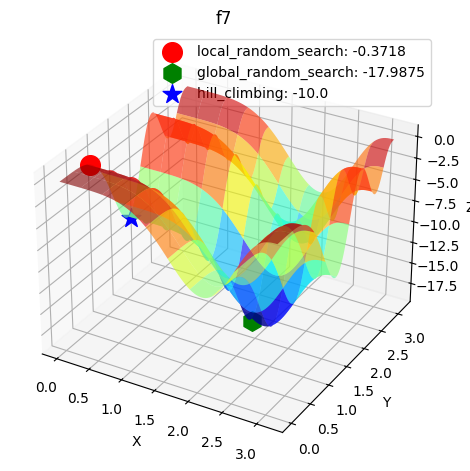

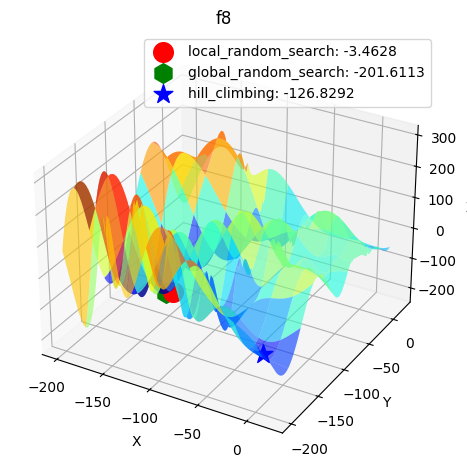

In [6]:
df = pd.read_csv('best_solutions.csv')

grouped = df.groupby('Function')
for name, group in grouped:
    xbest_values = group['xbest'].apply(ast.literal_eval)
    fbest_values = group['fbest']
    methods = group['Metodo']
    
    arg = next((arg for arg in args if arg["name"] == name), None)
    plot([i for i in xbest_values], [a for a in fbest_values], arg['objective_function'], arg['domain'][0], arg['domain'][1], [m for m in methods])

### QUESTÃO 02 ###

#### 2.1 ####

In [7]:
x = [5, 1, 4, 2, 6, 1, 4, 7]

def rainhasCombatentes(rainhas: list) -> int:
    """
    Retorna o número de rainhas combatentes no tabuleiro.
    """
    n = len(rainhas)
    combatentes = 0
    for i in range(n):
        for j in range(i+1, n):
            if rainhas[i] == rainhas[j] or abs(rainhas[i] - rainhas[j]) == abs(i - j):
                combatentes += 1
    return combatentes

def funcaoAptidao(rainhas: list) -> int:
    """
    Retorna a aptidão de um tabuleiro de xadrez.
    """
    return 28 - rainhasCombatentes(rainhas)


funcaoAptidao(x)

21

#### 2.2 #####

In [8]:
T = 100

#### 2.3 ####

In [9]:
def decaiTemperatura(T: float) -> float:
    return T * 0.99

#### 2.4

In [10]:
def perturb(x: list) -> list:
    i1,i2 = np.random.permutation(len(x))[0:2]
    x[i1],x[i2] = x[i2],x[i1]
    return x

#### 2.5

In [12]:
max_permutacoes = 92
combinacoes = set()

x_opt = np.random.permutation(8) + 1
f_opt = funcaoAptidao(x_opt)


tempoInicial = time()

while len(combinacoes) < max_permutacoes:
    x_cand = perturb(x_opt.copy())
    f_cand = funcaoAptidao(x_cand)

    P_ij = np.exp(-((f_cand - f_opt) / T))

    if f_cand > f_opt or P_ij > np.random.uniform(0, 1):
        x_opt = x_cand
        f_opt = f_cand

        if f_opt == 28:
            if len(combinacoes) == 0:
                tempoPrimeiraCombinacao = time() - tempoInicial
            
            if tuple(x_opt) not in combinacoes:
                combinacoes.add(tuple(x_opt))

    T = decaiTemperatura(T)

tempoTotal = time() - tempoInicial

print(f'Número de combinações: {len(combinacoes)}')
print(f'Tempo para a primeira combinação: {tempoPrimeiraCombinacao}')
print(f'Tempo total: {tempoTotal}')
            

Número de combinações: 92
Tempo para a primeira combinação: 0.0319976806640625
Tempo total: 5.43399715423584
